<a href="https://colab.research.google.com/github/kfahn22/julia_kaleidoscope/blob/main/mandelbulb_kaleidescope.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Documentation on using https://huggingface.co/docs/diffusers/using-diffusers/sdxlhttps://huggingface.co/docs/diffusers/using-diffusers/sdxl

# Mandelbulb Julia Kaleidescope Mash-Up

* The [stabilityai/sdxl-turbo](https://github.com/Stability-AI/generative-models) img2img model is used to generate "mandelbulb kaleidescope" images.

* The conditioning images are from [here](https://huggingface.co/datasets/kfahn/kaleidescope)

* The conditioning images were generated in P5.js using this [sketch](https://editor.p5js.org/kfahn/sketches/vugGJY9Gm) and uploaded to the Hugging Face Hub.   *Flash warning if you try to run the sketch!!*

* The model weights are downloaded from the Hugging Face Hub.  This notebook is based on the code [here](https://huggingface.co/docs/diffusers/using-diffusers/sdxl_turbo), where you can learn more about using the stabilityai/sdxl-turbo model.

**The  notebook is run with T4 High-RAM.**



First, let's install the necessary packages.

I am not sure why [omegaconf](https://omegaconf.readthedocs.io/en/2.1_branch/usage.html#variable-interpolation) is installed.



In [ ]:
#!pip install diffusers transformers ftfy accelerate huggingface_hub torchvision imagehash datasets
!pip install -q diffusers transformers accelerate omegaconf torchvision imagehash datasets

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 16.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 265.7/265.7 kB 22.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.5/79.5 kB 7.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 26.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 507.1/507.1 kB 40.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.0/117.0 kB 12.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 12.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 13.2 MB/s eta 0:00:00


Let's log into the Hugging Face hub to get access to the Stable Diffusion model.

In [ ]:
from huggingface_hub import notebook_login

notebook_login()

We will use the stabilityai/sdxl-turbo model

https://huggingface.co/stabilityai/sdxl-turbo

In [ ]:
from diffusers import AutoPipelineForText2Image
import torch
from PIL import Image, ImageShow

pipe = AutoPipelineForText2Image.from_pretrained("stabilityai/sdxl-turbo", torch_dtype=torch.float16, variant="fp16")
pipe.to("cuda")

prompt = "isotropic mandelbulb kaleidescope, in shades of blue, orange, and purple, 8K"
#prompt = 'mandelbulb kaleidescope, centered in image, purple, orange, blue, and aquamarine colors, highly detailed, 8K'
#prompt = 'towering rocket ships, sitting on a tundra before launch, summer, mountains in the background, 8K'

num_images_to_generate = 4

for idx in range(num_images_to_generate):
    image = pipe(prompt=prompt, num_inference_steps=1, guidance_scale=1.0).images[0]
    image.save(f"image_{idx}.png")


The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


0it [00:00, ?it/s]

model_index.json:   0%|          | 0.00/685 [00:00<?, ?B/s]

Fetching 18 files:   0%|          | 0/18 [00:00<?, ?it/s]

tokenizer/special_tokens_map.json:   0%|          | 0.00/586 [00:00<?, ?B/s]

text_encoder/config.json:   0%|          | 0.00/565 [00:00<?, ?B/s]

text_encoder_2/config.json:   0%|          | 0.00/575 [00:00<?, ?B/s]

tokenizer/merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

scheduler/scheduler_config.json:   0%|          | 0.00/459 [00:00<?, ?B/s]

tokenizer/tokenizer_config.json:   0%|          | 0.00/704 [00:00<?, ?B/s]

model.fp16.safetensors:   0%|          | 0.00/1.39G [00:00<?, ?B/s]

model.fp16.safetensors:   0%|          | 0.00/246M [00:00<?, ?B/s]

tokenizer_2/special_tokens_map.json:   0%|          | 0.00/460 [00:00<?, ?B/s]

tokenizer/vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

tokenizer_2/tokenizer_config.json:   0%|          | 0.00/855 [00:00<?, ?B/s]

tokenizer_2/merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

unet/config.json:   0%|          | 0.00/1.78k [00:00<?, ?B/s]

vae/config.json:   0%|          | 0.00/607 [00:00<?, ?B/s]

diffusion_pytorch_model.fp16.safetensors:   0%|          | 0.00/5.14G [00:00<?, ?B/s]

diffusion_pytorch_model.fp16.safetensors:   0%|          | 0.00/167M [00:00<?, ?B/s]

tokenizer_2/vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

https://huggingface.co/docs/datasets/access

Let's download the dataset from the Hugging Face Hub

In [ ]:
# https://huggingface.co/datasets/kfahn/kaleidescope
from datasets import load_dataset
dataset = load_dataset("kfahn/kaleidescope")


Generating train split:   0%|          | 0/418 [00:00<?, ? examples/s]

In [ ]:
dataset

DatasetDict({
    train: Dataset({
        features: ['image'],
        num_rows: 418
    })
})

In [ ]:
n = dataset['train'].num_rows

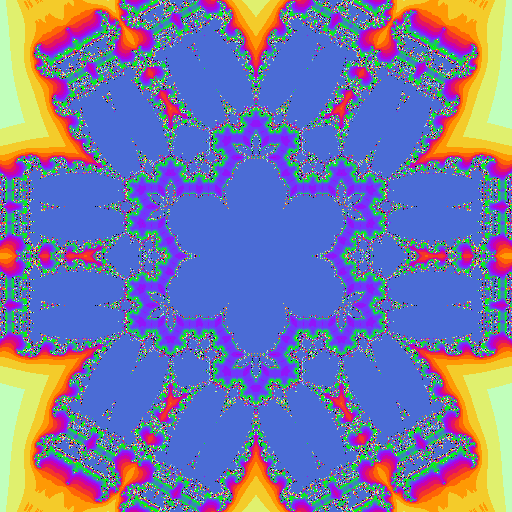

In [ ]:
dataset['train'][0]['image']

I wanted to load a random image from the dataset.  However, there appears to be an authorization issue.

In [ ]:
from PIL import Image
from io import BytesIO
import requests
import random

# Find length of dataset
n = dataset['train'].num_rows
random_index = random.randint(0, n-1)

7
# Example URL
# Access is denied when it is a random number
image_url1 = f'https://datasets-server.huggingface.co/assets/kfahn/kaleidescope/--/ea252664c2393c29357619049c06d1a0d9e51a1c/--/default/train/{random_index}/image/image.png'
image_url2 = "https://datasets-server.huggingface.co/assets/kfahn/kaleidescope/--/ea252664c2393c29357619049c06d1a0d9e51a1c/--/default/train/11/image/image.png"

print(image_url1)
print(image_url2)
# Download the image using requests
response = requests.get(image_url2)
# Check if the request was successful
if response.status_code == 200:
    # Open the image using Pillow and BytesIO
    img = Image.open(BytesIO(response.content))

    # Now you can work with the image
    img.show()
else:
    print(f"Failed to download image. Status code: {response.status_code}")


https://datasets-server.huggingface.co/assets/kfahn/kaleidescope/--/ea252664c2393c29357619049c06d1a0d9e51a1c/--/default/train/139/image/image.png
https://datasets-server.huggingface.co/assets/kfahn/kaleidescope/--/ea252664c2393c29357619049c06d1a0d9e51a1c/--/default/train/67/image/image.png


Trying to add random image from dataset.  This works but colors are muted and had to resize to lowe res due to out-of-memory error.

In [ ]:
from torch.utils.data import DataLoader
import random

# Find length of dataset
n = dataset['train'].num_rows
random_index = random.randint(0, n-1)

# I have gotten out of memory errors running this
# The colors also are not as vibrant
#init_image = dataset['train'][random_index]['image'].resize((64, 64))


In [ ]:
import matplotlib.pyplot as plt

def plot_images(images, title=None):
    plt.figure(figsize=(20, 20))
    for i in range(len(images)):
        ax = plt.subplot(1, len(images), i + 1)
        if title is not None:
            plt.title(title)
        plt.imshow(images[i])
        plt.axis("off")

We will use the thee pretrained "stability/sdxl-turbo" model and move operations to cuda.
It is important to noce that the num_inference_steps * strength must be larger or equal to 1 or you will get an error.

OK, now let's generate some images!

In [ ]:
import torch
import os
import gc
import PIL
from PIL import Image
from diffusers import AutoPipelineForImage2Image
from diffusers.utils import load_image, make_image_grid

pipe = AutoPipelineForImage2Image.from_pretrained("stabilityai/sdxl-turbo", torch_dtype=torch.float16, variant="fp16")
pipe.to("cuda")

prompt = "mandelbulb kaleidescope"

# Try to generate more than one at a time
list_of_urls = ["https://datasets-server.huggingface.co/assets/kfahn/kaleidescope/--/ea252664c2393c29357619049c06d1a0d9e51a1c/--/default/train/0/image/image.png",
                "https://datasets-server.huggingface.co/assets/kfahn/kaleidescope/--/ea252664c2393c29357619049c06d1a0d9e51a1c/--/default/train/1/image/image.png",
                "https://datasets-server.huggingface.co/assets/kfahn/kaleidescope/--/ea252664c2393c29357619049c06d1a0d9e51a1c/--/default/train/2/image/image.png",
                "https://datasets-server.huggingface.co/assets/kfahn/kaleidescope/--/ea252664c2393c29357619049c06d1a0d9e51a1c/--/default/train/3/image/image.png",
                "https://datasets-server.huggingface.co/assets/kfahn/kaleidescope/--/ea252664c2393c29357619049c06d1a0d9e51a1c/--/default/train/4/image/image.png",
                "https://datasets-server.huggingface.co/assets/kfahn/kaleidescope/--/ea252664c2393c29357619049c06d1a0d9e51a1c/--/default/train/5/image/image.png",
                "https://datasets-server.huggingface.co/assets/kfahn/kaleidescope/--/ea252664c2393c29357619049c06d1a0d9e51a1c/--/default/train/6/image/image.png",
                "https://datasets-server.huggingface.co/assets/kfahn/kaleidescope/--/ea252664c2393c29357619049c06d1a0d9e51a1c/--/default/train/11/image/image.png",
                "https://datasets-server.huggingface.co/assets/kfahn/kaleidescope/--/ea252664c2393c29357619049c06d1a0d9e51a1c/--/default/train/33/image/image.png",
                "https://datasets-server.huggingface.co/assets/kfahn/kaleidescope/--/ea252664c2393c29357619049c06d1a0d9e51a1c/--/default/train/67/image/image.png",
                "https://datasets-server.huggingface.co/assets/kfahn/kaleidescope/--/ea252664c2393c29357619049c06d1a0d9e51a1c/--/default/train/222/image/image.png"]

generated_images = "/content/generated_images"
os.makedirs(generated_images, exist_ok=True)

num_images_to_generate = 10
images = []

for idx in range(num_images_to_generate):
    init_image = load_image(list_of_urls[idx]).resize((512,512))
    image = pipe(prompt, image=init_image, num_inference_steps=2, strength=0.5, guidance_scale=0.0).images[0]
    image.save(f"generated_images/image_{idx}.png")
    images.append(image)
    gc.collect()

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

## Now for the fun part - let's look at the images we generated!

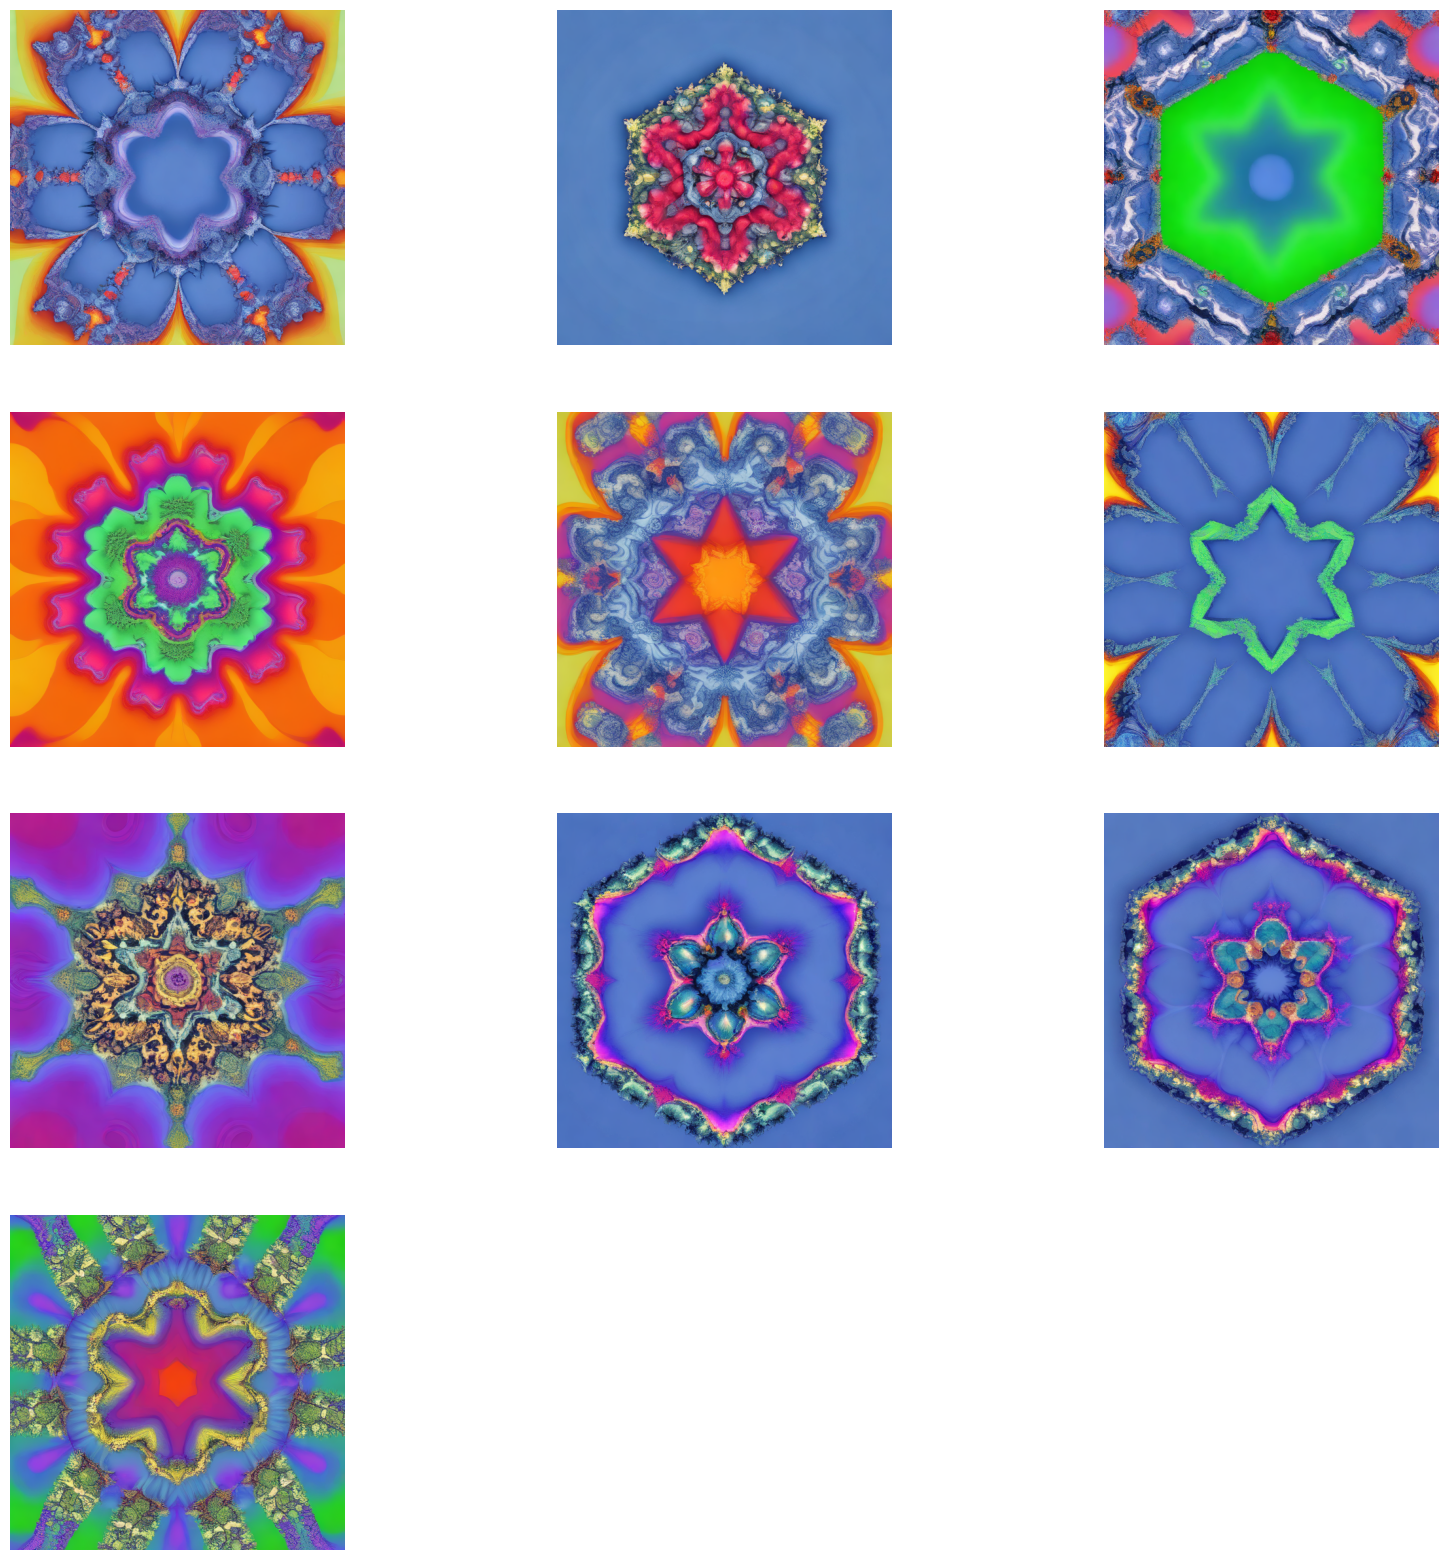

In [ ]:
import math
import matplotlib.pyplot as plt

n = num_images_to_generate - 1

nb_row = math.ceil(math.sqrt(num_images_to_generate))

def plot_images(images, title=None):
    plt.figure(figsize=(20, 20))
    for i in range(len(images)):
        ax = plt.subplot(nb_row, 3, i + 1)
        if title is not None:
            plt.title(title)
        plt.imshow(images[i])
        plt.axis("off")

plot_images(images)


In [ ]:
from google.colab import drive
drive.mount('/content/drive')